<h1 align = "center"> santoshhulbutti@gmail.com   |   DataTrained   |   Evaluation Project # 01</h1>

<h1 align = "center"> <font color = "blue"> Baseball Case Study</font></h1>

<h1 align="center"> Problem Statement</h1>


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import statsmodels.api as sm


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold



from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle



import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [50]:
data_url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"

data0 = pd.read_csv(data_url)

<h1 align="center"><font color = "red">Data Visualization & EDA</font> </h1>

<h2><font color = "blue">01. Checking the data using .head(), .shape, features' dtypes using .info()</font></h2>

In [51]:
data0.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [52]:
data0.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### From YouTube..
- Baseball Explained in 5 Minutes: https://www.youtube.com/watch?v=I8VGW0C_GO4
- Baseball Rules for Beginners | Easy Explanation: https://www.youtube.com/watch?v=E160D9rEY0M
- Pitching Statistics: https://www.youtube.com/watch?v=cjKeppbTaqc
- Batting Statistics: https://www.youtube.com/watch?v=nphT9Ztjgh0


### From Wikipedia..
- #### Batting statistics:

    - R – Runs scored: number of times a player crosses home plate
    - AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.  The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out. 
    - H – Hit: reaching base because of a batted, fair ball without error by the defense
    - 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    - 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    - HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    - BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. 
    - SO – Strike out (also abbreviated K): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.

 
- #### Pitching statistics:
    - W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
    - RA – Run average: number of runs allowed times nine divided by innings pitched
    - ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    - ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    - CG – Complete game: number of games where player was the only pitcher for their team
    - SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. 
    - SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either
        - (a) the lead was three runs or fewer when the pitcher entered the game;
        - (b) the potential tying run was on base, at bat, or on deck; or
        - (c) the pitcher pitched three or more innings


   
- #### Base running statistics:

    - SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.


- #### Fielding statistics:

    - E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

In [53]:
data0.shape

(30, 17)

In [54]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Observation:
The data set has 30 rows of data & 17 Columns.

1. 30 rows imply 30 teams.
1. The first Column is Wins column.. i.e, Target Variable.
2. There are 16 features in the given data. all are of integer type except ERA, which is float type variable.

<h2><font color = "blue">03. Checking for descriptive statistics...</font></h2>

In [55]:
#Descriptive statistics
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


### Observation:
1. We see no missing observation from count. every feature has 30 observations.
2. as this is the data of 30 teams statistics, & they are of only numerical values, all the features needs to be treated as continous data.
2. CG has 0 as a minimum value. implying there are some teams which played zero games with single pitcher.
    - CG more >=1 : it means number of times a team played game where pitcher in the team was the only pitcher for their
    entire game. higher the CG is best the pitcher in that team.
3. the value range of each feature is different.

In [56]:
#percentage difference between mean & median
(abs((data0.describe().T['mean'] - data0.describe().T['50%'])*100/data0.describe().T['mean'])).sort_values()

SB      0.000000
W       0.041169
R       0.111396
AB      0.113603
2B      0.279058
BB      0.831379
3B      0.958466
RA      1.055843
SO      1.065534
ER      1.363041
H       1.498599
ERA     1.735614
SV      2.476780
HR      3.137095
E       3.533569
SHO     6.194690
CG     13.461538
dtype: float64

### Observation:
1. The mean & median values for all columns are very close within 4%, except SHO & CG which shows skewness in the two columns.

In [57]:
#percentage difference between 75% quantile & max
((data0.describe().T['max'] - data0.describe().T['75%'])*100/data0.describe().T['max']).sort_values()

AB      1.398478
H       4.191419
2B      6.250000
BB     12.061404
W      12.250000
RA     13.210900
SO     13.603426
ER     14.987484
ERA    16.269841
R      19.388328
3B     20.408163
E      23.214286
HR     23.706897
SV     24.596774
SB     27.985075
SHO    38.095238
CG     47.727273
dtype: float64

### Observation:
1. there are some features with % difference between 75% quantile & maximum value, more than 20%  indicate possible outliers.

<h2><font color = "blue">02. Checking for duplicate entries...</font></h2>

In [58]:
data0.duplicated().sum()

0

### Observations:
1. No Duplicate entries.

<h2><font color = "blue">04. Checking for missing & null values...</font></h2>

In [59]:
data0.isnull().sum().sum()

0

### Observations:
1. Data set has no missing value/null value.

<h2><font color = "blue">05. Checking entries with ZERO Value...</font></h2>

In [60]:
data0[data0 == 0.0].count()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

### Observation:
1. CG has 3 entries as '0'(ZERO). implying there are 3 teams which played zero games with single pitcher.
2. CG more >=1 : it means number of times a team played game where pitcher in the team was the only pitcher for their

<h2 align="center"><font color = "red">EDA : Numerical Feature Analysis...</font> </h2>

<h2 align='center'><font color = "magenta">Data Visualization...</font></h2>

<h2><font color = "blue">06. Outliers & Skewness...</font></h2>

## Checking outliers

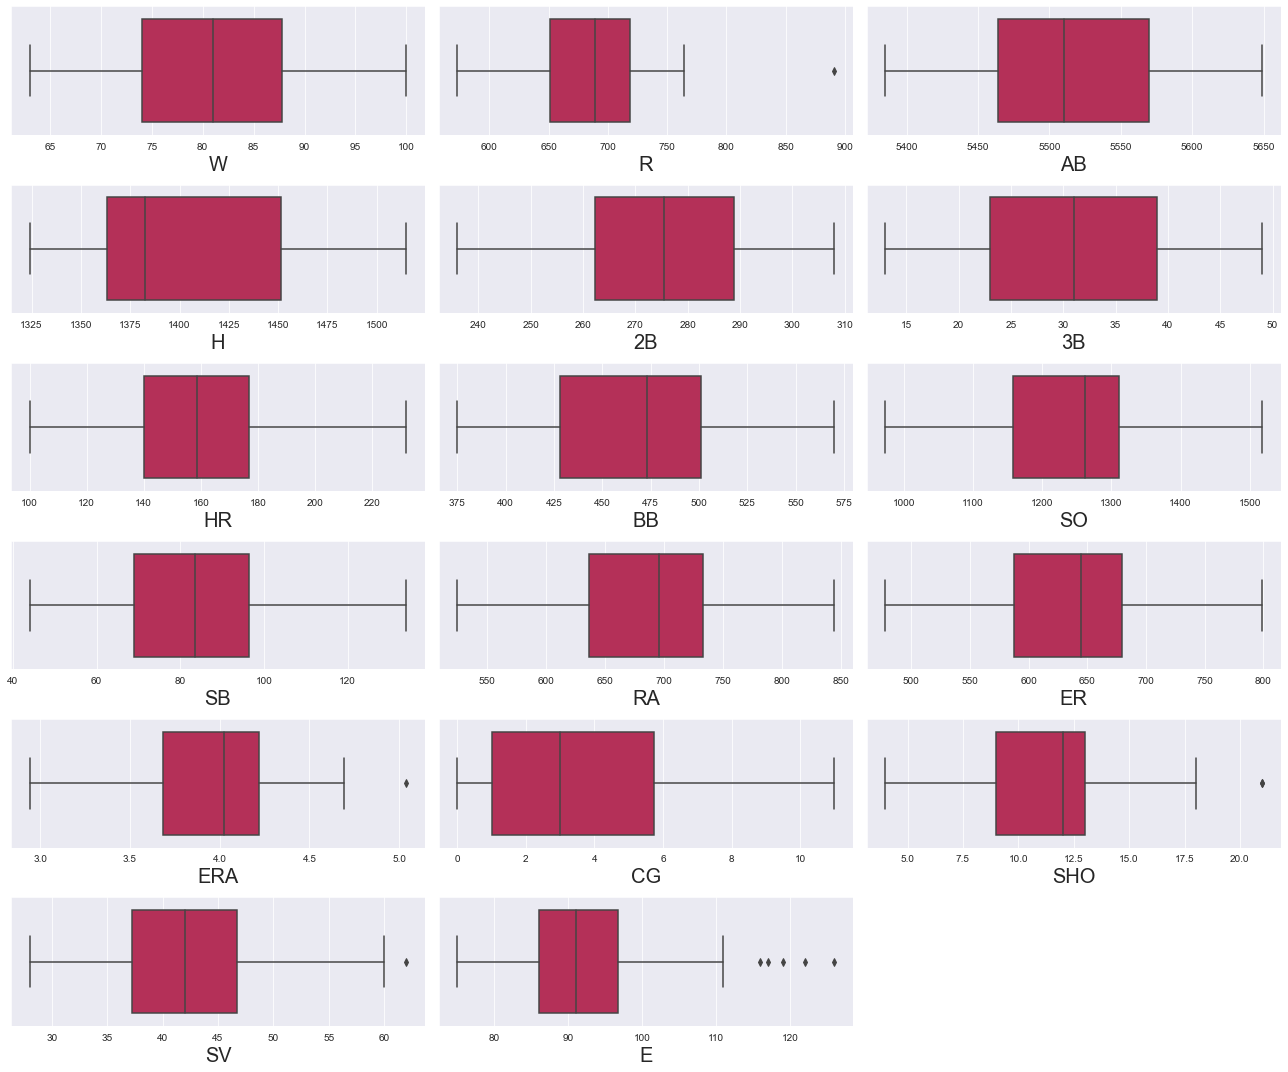

In [61]:
plt.figure(figsize=(18,15))
plotnumber =1
for column in data0.columns:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data0[column], orient='h', palette="rocket_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Observation
1. As seen in the boxplot there are some outliers in R, ERA, SHO, SV & E.

But as we have data of 30 teams, removing outliers means removing data of some team, for that reason, we will not remove outliers. Also removing at least 3 outliers means removing 10% of the data in given dataset, which we should avoid.

## Checking Skewness...

In [62]:
data0.skew().sort_values(ascending = True)

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

### Observation
1. SV, H, CG, E & R have right or positive skewness. these are above the limit of +0.65.

<h2><font color = "blue">07. Univariate Analysis ...</font></h2>

## Checking Distribution...

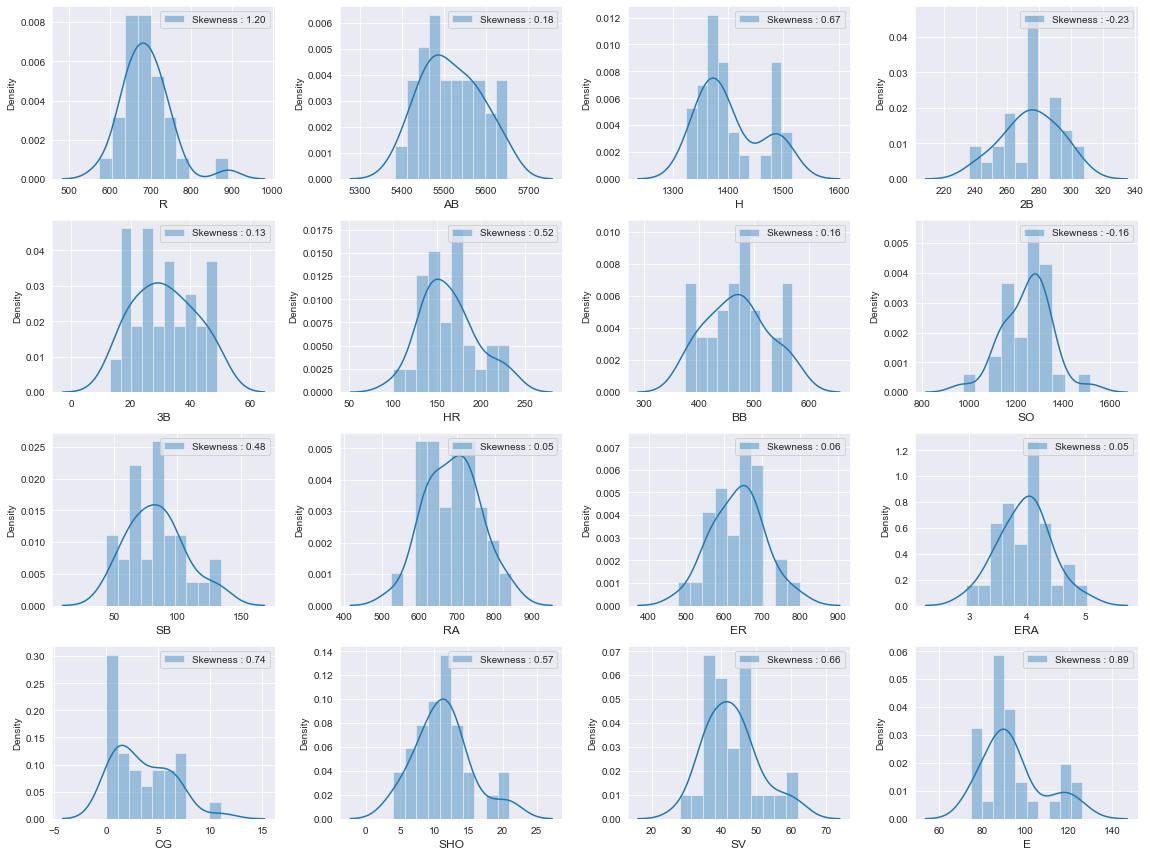

In [63]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(16,12))
for column in data0.drop('W', axis=1).columns:
    plt.subplot(4,4,i+1)
    sns.distplot(data0.drop('W', axis=1)[column], bins=10, label="Skewness : %.2f"%(data0[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation
1. R, H, CG, SV & E features have skewness values below/above -0.65/+0.65. implying skewness present in the data set.
2. AB, 3B, BB, SO, RA, ER & ERA are normally distributed with skewness value within the limits of -0.65/+0.65.

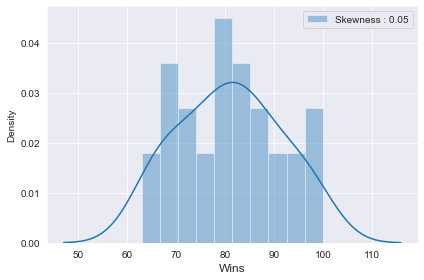

In [65]:
#distribution of target variable
plt.figure(figsize=(6,4))
sns.distplot(data0['W'], bins=10, label="Skewness : %.2f"%(data0['W'].skew())).legend(loc="best")
plt.xlabel('Wins',fontsize=12)
plt.tight_layout()

### Observation
1. Target variable is normally distributed. with no skewness.

<h2><font color = "blue">08. Bivariate Analysis...</font></h2>

### regplot

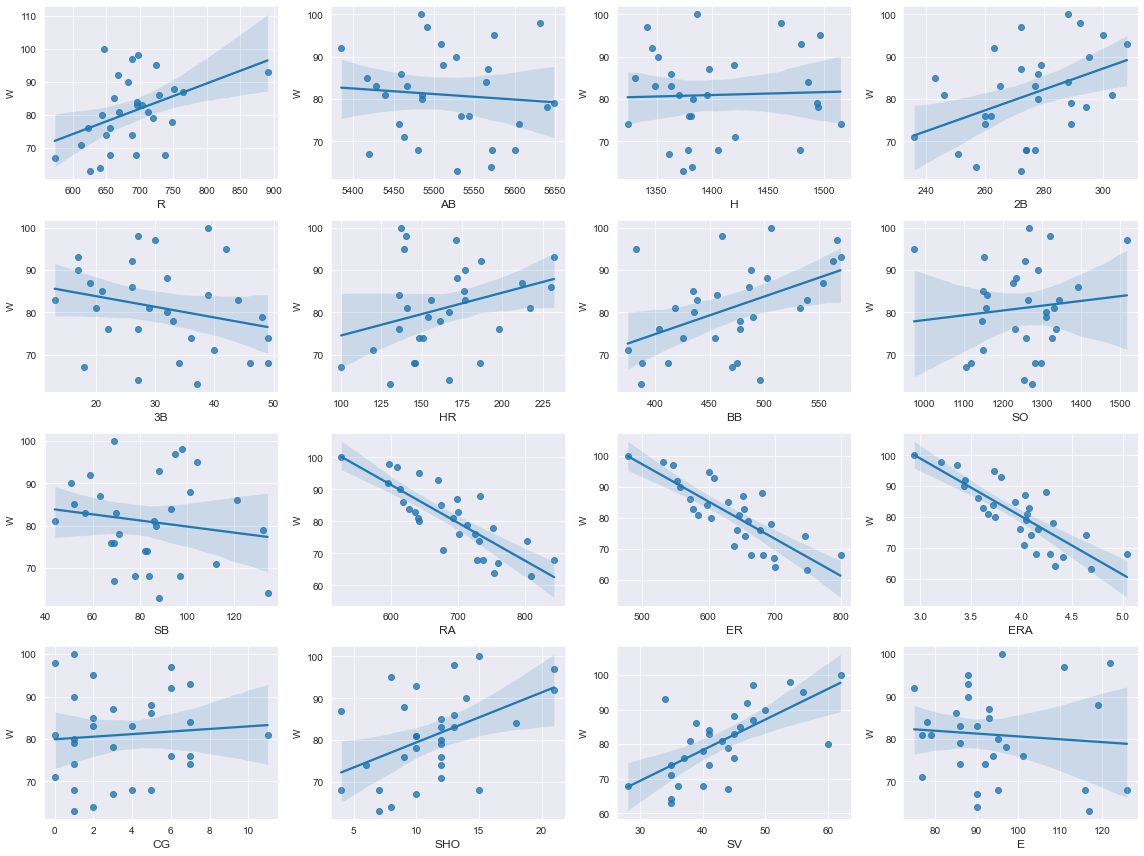

In [66]:
#linear regplot with distribution of numerical features with target column.. 
i=0
plt.figure(figsize=(16,12))
for column in data0.drop('W', axis=1).columns:
    plt.subplot(4,4,i+1)
    sns.regplot(x=column, y='W', data=data0)
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation
1. R-Runs, 2B-Double base, HR-Home run, BB-Base on balls or Walk, SHO-Shoutout, SV-Saves seems to have <b>positve relation</b> with the wins.
2. 3B-triple base, SB-Stolern base, RA-run average, ER-Earned run, ERA-Earned run average have <b>negative relation</b> with the wins.
3. AB-At bats, H-hit, SO-strikeout, CG-complete game & E-errors shows <b>no clear relation</b> with wins for the team. need to do further analysis for these features.

### pairplot
### we will do bivariate analysis for batting & pitching statistics...

In [67]:
#separating batting & pitching stats
data0_bat = data0[['R','AB','H','2B','3B','HR','BB','SO']]
data0_pit = data0[['RA','ER','ERA','CG','SHO','SV']]

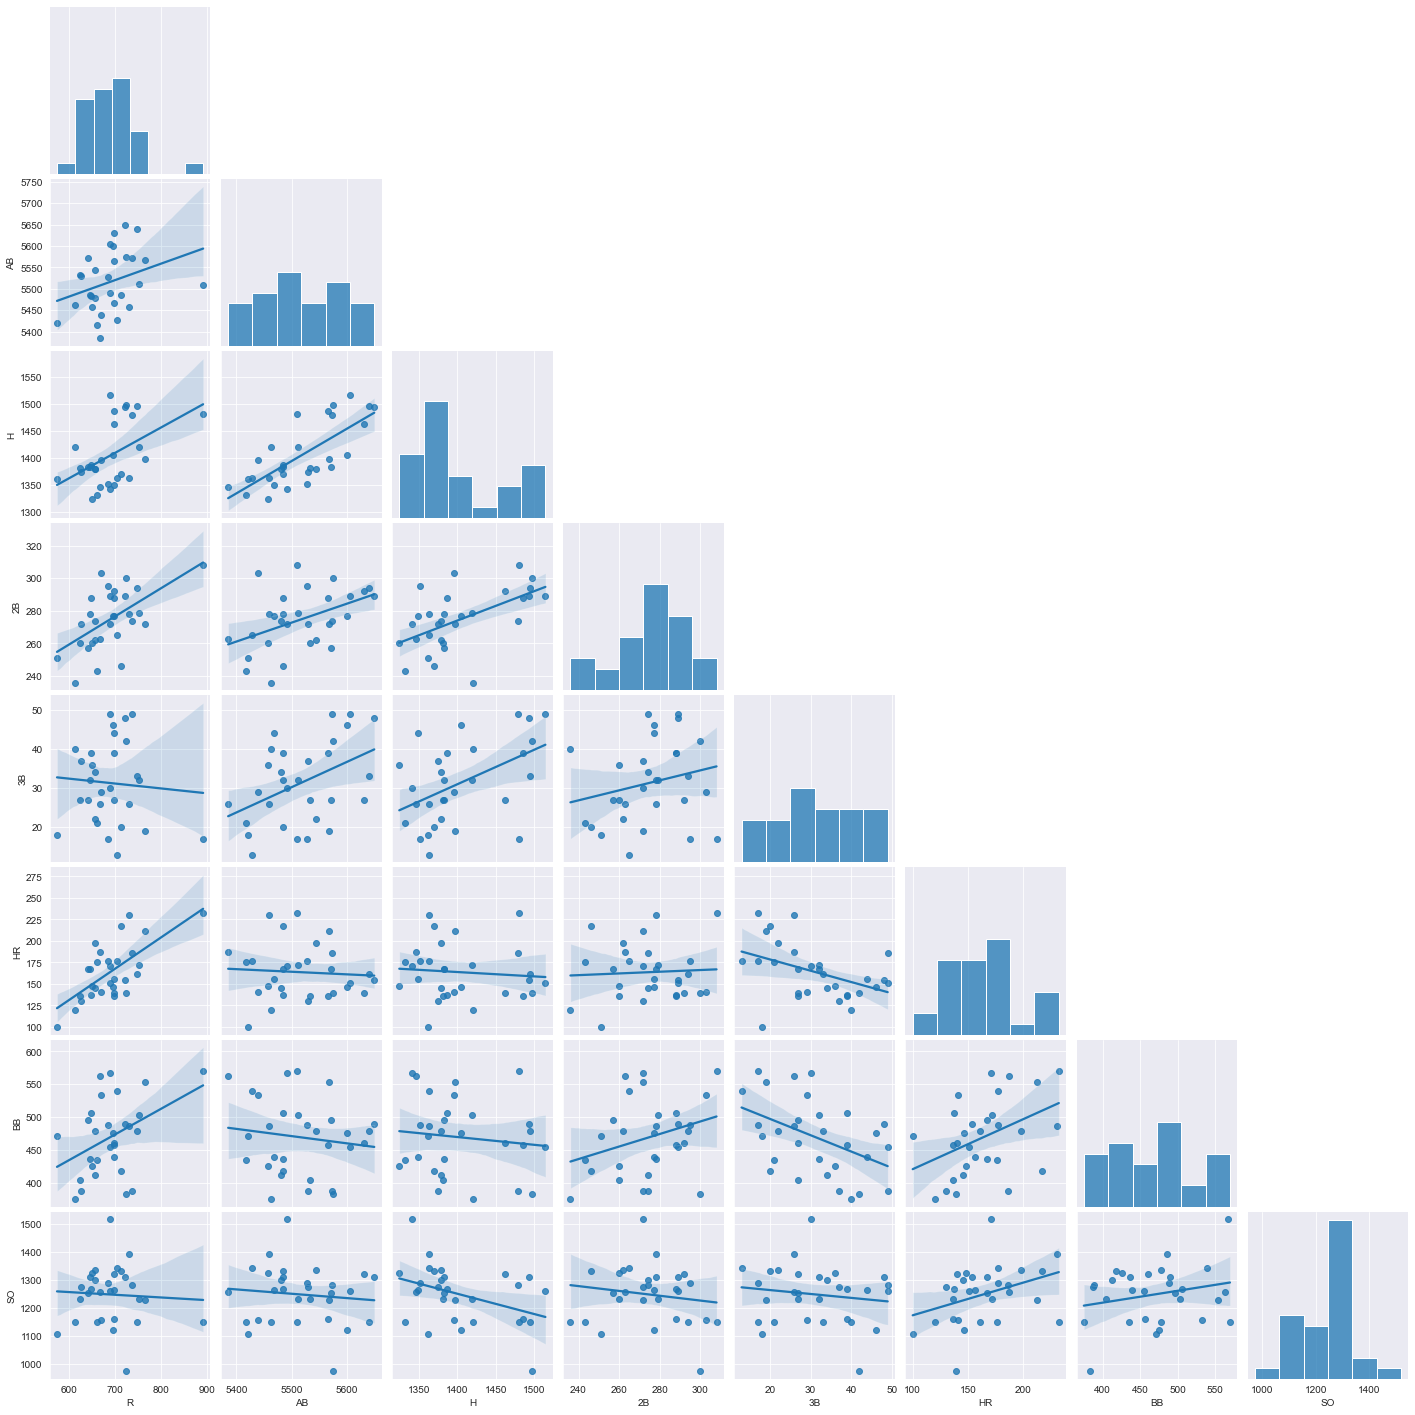

In [68]:
#for batting stats
sns.pairplot(data0_bat, kind='reg', corner=True);

### Observation

From pairplot we observe <b>POSITIVE</b> relation amongst,
1. AB with R, (if a batter hits & get a base, next batter comes at the home base)
2. H with R & AB, (when a batter hit he gets run & next batter comes thereby more number of at bats.)
3. 2B with R, AB & H,
4. 3B with AB & H,
5. HR with R, (a home run makes 1 full run, if a team does a home run it gets 1 run on their score board)
6. BB with R, 2B & HR,
7. SO with HR. (when a batters gets strikeout, next batter comes in to play.. no run is given. this relation does not bring any meaning).


From pairplot we observe <b>NEGATIVE</b> relation amongst,
1. 3B with HR & BB.


summary:
1. some independent features have linear relation(both positive & negative) between each other.
2. Some independent features have no clear relation with other independent features.
3. the pairplot hints presence multicollinearity & useless feature redundancy.

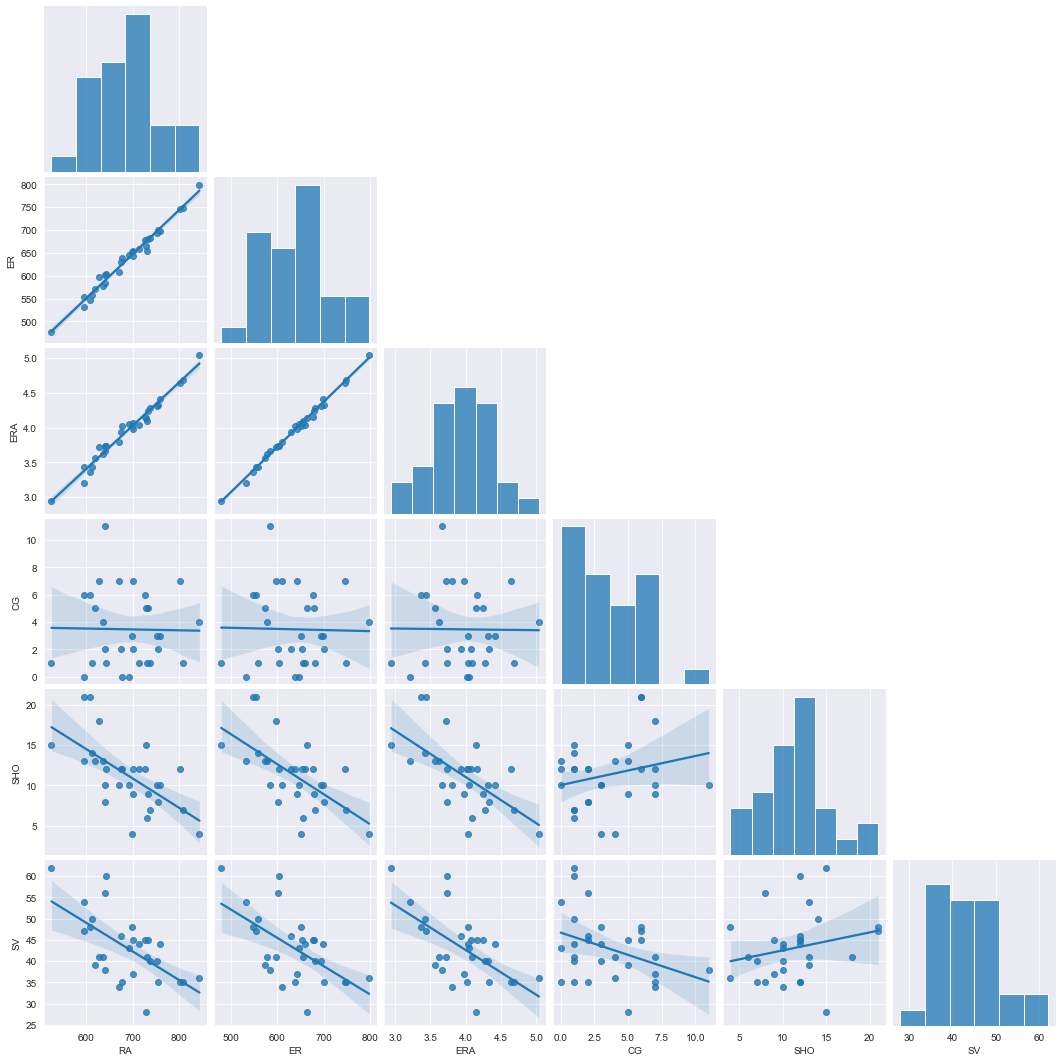

In [69]:
#for pitching stats
sns.pairplot(data0_pit, kind='reg', corner=True);

### Observation

From pairplot we observe <b>POSITIVE</b> relation amongst,
1. RA, ER & ERA.(here it seems these are having strong relations among themselves implying multicollinearity).
    also RA & ERA are the runs calculated based on the ER. hence the strong relation.


From pairplot we observe <b>NEGATIVE</b> relation amongst,
1. SHO with RA, ER & ERA.
2. SV with RA, ER, ERA & CG. (saving a run implies less runs on the board hence as the defence saves more runs the offence team i.e., batting team score less.)


summary:
1. some independent features have linear relation(both positive & negative) between each other.
2. CG has no relation with RA, ER, ERA % SHO.
3. the pairplot hints presence multicollinearity & useless feature redundancy.

### correlation plot

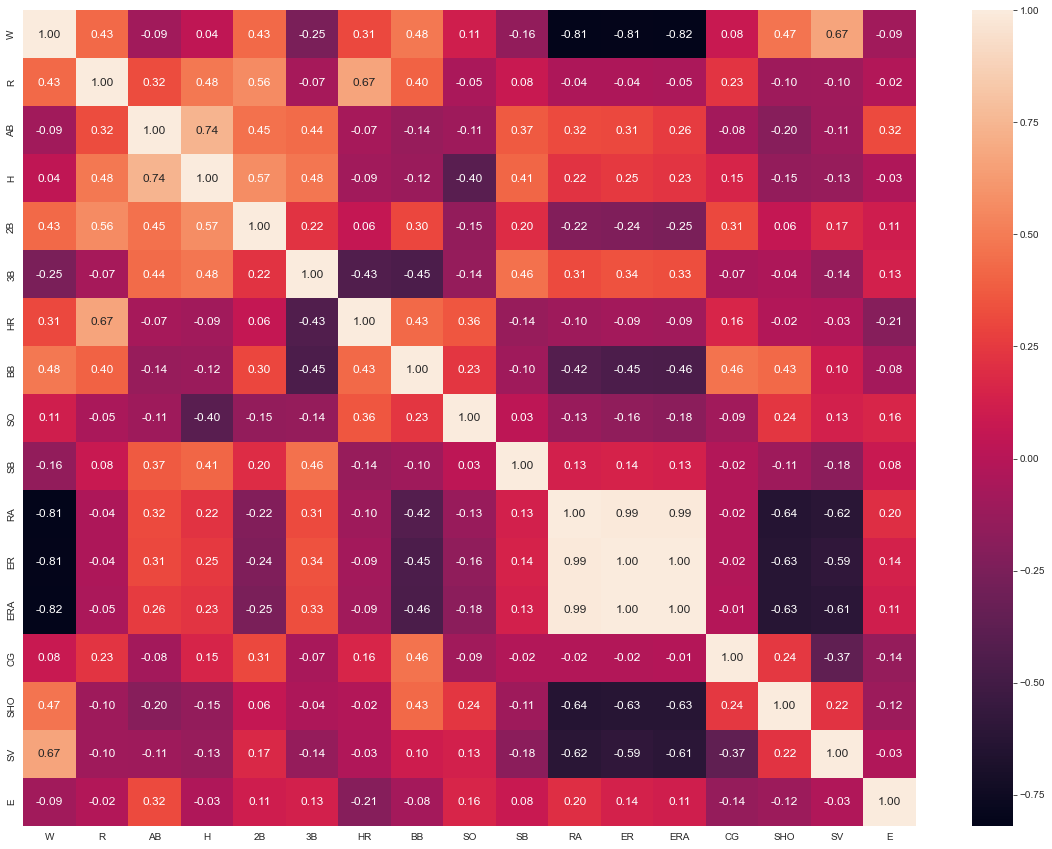

In [70]:
plt.figure(figsize=(20,15))
sns.heatmap(data0.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

### Observation
Correlation with Target variable:
   1. RA, ER, & ERA has very <b>high negative</b> correlation with 'Win'.
   2. 3B has <b>mild negative</b> correlation with 'Win'.
   3. R, 2B, HR, BB SHO & SV has <b>positive</b> correlation with 'Win'.
   4. AB, H, CG & E has <b>weak correlation</b> with 'Win'.
   
Correlation of independant features with each other:
   1. R has positive correlation with AB, H, 2B, HR, BB & CG, & almost no relation with other features
   2. AB has strong positive correlation with H. it also has positve relation with 2B, 3B, SB, RA, ER, ERA & E.
   3. H is positively correlated with 2B, 3B, SB, RA, ER, ERA. it also has negative correlation with SO.
   4. 2B is correlated with 3B, BB, SB & CG in positive fashion, & with RA, ER & ERA it is negatively correlated.

<h1 align="center"><font color = "red">Data Cleaning</font> </h1>

<h2><font color = "blue">09. Data preparation for ML model</font></h2>

### Skewness Removal..

In [71]:
x = data0.drop(columns = ['W'])
y = data0['W']

In [72]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

x_pt = pt.fit_transform(x)

In [73]:
x_pt = pd.DataFrame(x_pt, columns = x.columns)
x_pt.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


In [75]:
x_pt.skew()

R     -0.055006
AB     0.090410
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

#### Observation:
Skewness is within the range of+/-0.5 for numerical features. Hence there is no skewness now.

### Outliers Removal

In [76]:
data1_feat = x_pt.copy()

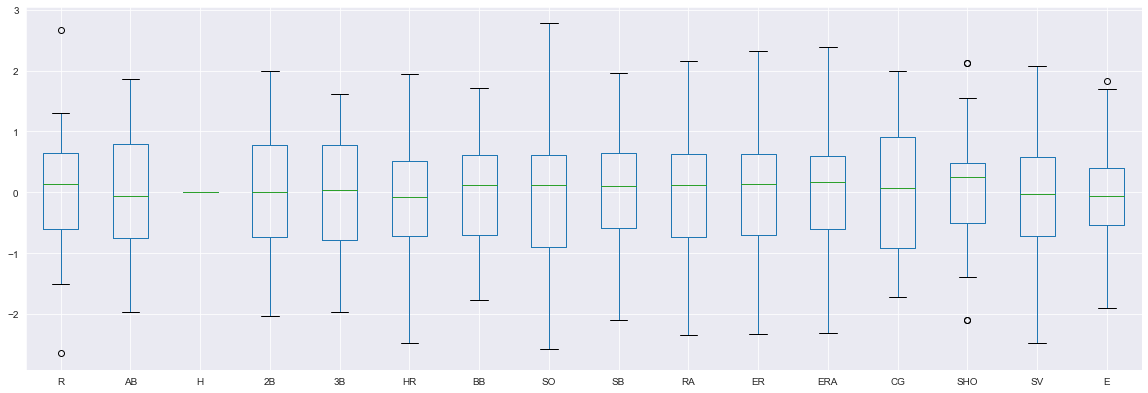

In [77]:
data1_feat.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

It seems that all the data points are within the range of 3Z.

Let's check using Z-Score

In [78]:
from scipy.stats import zscore
(np.abs(zscore(data1_feat))<3).all()

R      True
AB     True
H      True
2B     True
3B     True
HR     True
BB     True
SO     True
SB     True
RA     True
ER     True
ERA    True
CG     True
SHO    True
SV     True
E      True
dtype: bool

#### Obseravtion:
1. There are no outliers in the data set as per z-score method, we are good to go..

<h2><font color = "blue">10. Feature Selection, Multicollinearity & Dimensionality Reduction </font></h2>

In [80]:
data2 = data1_feat.copy()

In [81]:
# copying the data
data2['W'] = data0['W']

In [83]:
data2.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953,95
1,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211,83
2,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331,81
3,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524,76
4,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211,74


In [84]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(data2['W'], sm.add_constant(data2.drop('W', axis=1))).fit()
# print(model.params)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     16.66
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           2.13e-06
Time:                        20:50:47   Log-Likelihood:                -68.420
No. Observations:                  30   AIC:                             168.8
Df Residuals:                      14   BIC:                             191.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9659      0.633    127.975      0.0

### Observation
1. From stats summary we see that,  the f-statistics value 16.66 & p-value is less than 0.05, signifying that the target variable is dependent on the independent variable.
2. Only R & SV are significant independant variables which explain the independant variable 'W', rest all fail to explain.
3. The condition number is large, 1.59e+16. This might indicate that there is strong multicollinearity.

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
df_feat = data2.drop('W', axis=1)
df_tgt = data2['W']

vif = pd.DataFrame()
vif["variables"] = df_feat.columns
vif["VIF"] = [variance_inflation_factor(df_feat.values, i) for i in range(df_feat.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,ER,1936.282960
11,ERA,1273.931843
9,RA,216.653929
5,HR,9.831437
1,AB,9.296483
0,R,8.442538
2,H,7.616434
14,SV,4.999084
3,2B,3.681503
6,BB,3.463897


In [91]:
data2.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.365846,0.457600,0.574011,-0.015497,0.696539,0.371344,0.021355,0.073634,-0.073207,-0.067942,-0.080371,0.241789,-0.075620,-0.043006,-0.002382,0.460294
AB,0.365846,1.000000,0.736537,0.445409,0.427214,-0.028824,-0.131760,-0.102277,0.377779,0.316515,0.310161,0.256341,-0.063826,-0.201189,-0.143546,0.339076,-0.089675
H,0.457600,0.736537,1.000000,0.569962,0.453708,-0.095482,-0.121247,-0.409348,0.445900,0.221851,0.251598,0.231124,0.123546,-0.152027,-0.170386,-0.020470,0.018306
2B,0.574011,0.445409,0.569962,1.000000,0.204475,0.076143,0.301392,-0.173551,0.236904,-0.228612,-0.245781,-0.263350,0.279284,0.066977,0.129807,0.097293,0.434324
3B,-0.015497,0.427214,0.453708,0.204475,1.000000,-0.393924,-0.458272,-0.133889,0.508077,0.295742,0.322298,0.313272,-0.066691,-0.047706,-0.182646,0.102814,-0.244971
HR,0.696539,-0.028824,-0.095482,0.076143,-0.393924,1.000000,0.417581,0.385912,-0.179200,-0.105691,-0.088189,-0.096858,0.194161,-0.027620,0.019674,-0.145955,0.319035
BB,0.371344,-0.131760,-0.121247,0.301392,-0.458272,0.417581,1.000000,0.238514,-0.107299,-0.413502,-0.450727,-0.458850,0.480102,0.405895,0.118506,-0.067006,0.478181
SO,0.021355,-0.102277,-0.409348,-0.173551,-0.133889,0.385912,0.238514,1.000000,0.017165,-0.141401,-0.174501,-0.192592,-0.095856,0.216663,0.173120,0.176769,0.124430
SB,0.073634,0.377779,0.445900,0.236904,0.508077,-0.179200,-0.107299,0.017165,1.000000,0.144945,0.152631,0.136497,0.015024,-0.109000,-0.206638,0.117440,-0.158285
RA,-0.073207,0.316515,0.221851,-0.228612,0.295742,-0.105691,-0.413502,-0.141401,0.144945,1.000000,0.990953,0.986544,0.046866,-0.639168,-0.595927,0.232580,-0.813766


In [103]:
df_feat = data2.drop(['RA', 'ERA', 'H', 'W'], axis=1)
df_tgt = data2['W']

vif = pd.DataFrame()
vif["variables"] = df_feat.columns
vif["VIF"] = [variance_inflation_factor(df_feat.values, i) for i in range(df_feat.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,R,6.250135
4,HR,5.940467
8,ER,4.232741
2,2B,3.317861
5,BB,2.927997
3,3B,2.922904
10,SHO,2.801262
1,AB,2.324181
9,CG,2.211205
6,SO,2.116299


### Observation:
We can see that multicollinerity is within permissible limit of 10.

### Checking distribution for cleaned data

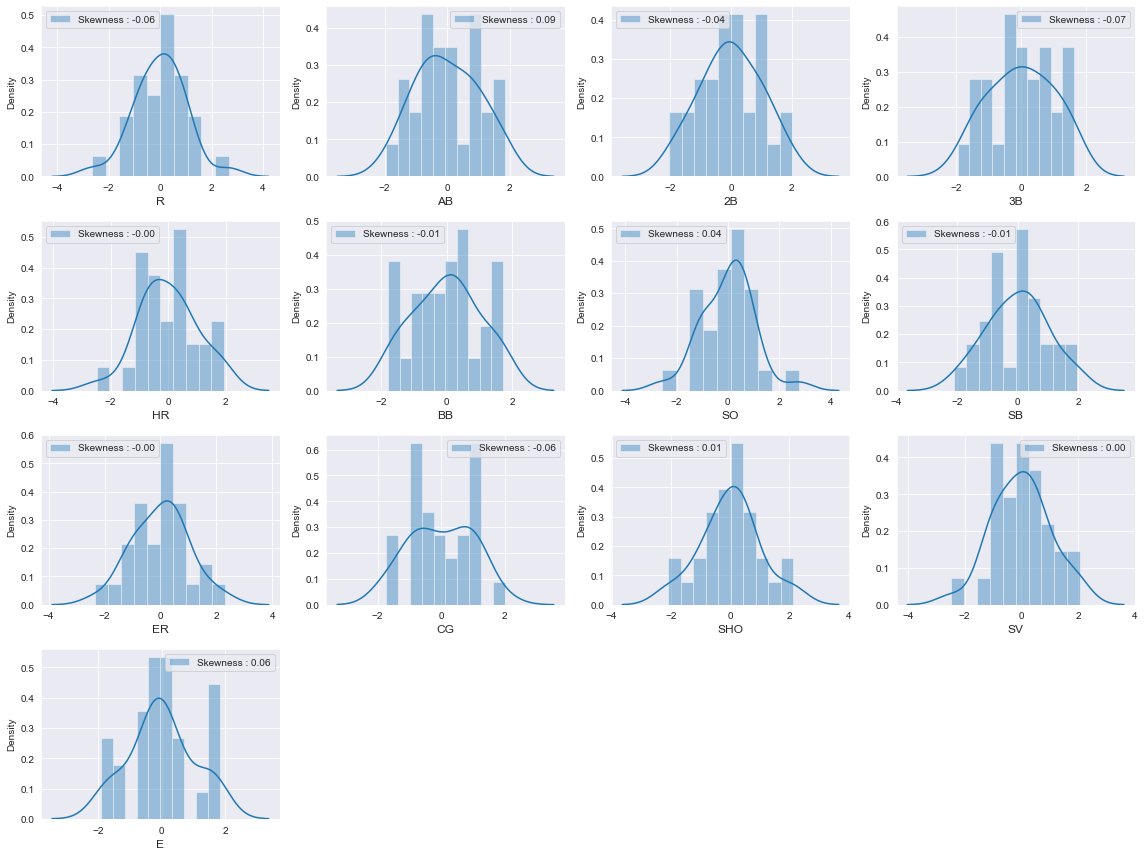

In [105]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(16,12))
for column in df_feat.columns:
    plt.subplot(4,4,i+1)
    sns.distplot(df_feat[column], bins=10, label="Skewness : %.2f"%(df_feat[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation:
After cleaning all the features are normally distributed.

<h2><font color = "blue">11. Scaling the data & splitting into Train and Test sets</font></h2>

<h1 align="center"><font color = "red">Model Selection</font> </h1>

In [111]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
xgb = XGBRegressor()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Linear Regression Model
 
for Linear Regression model, Best Random_state number for splitting the data is:  6
 
===scores for training set===
r2 score for training set 0.9260420478159347
MAE for training set:  2.3144349201495835
MSE for training set:  7.34984401909036
SMSE for training set:  2.71105957497993
 
===scores for testing set===
r2 score for testing set :  0.8996603579437406
MAE for testing set:  2.8860409343031836
MSE for testing set:  11.79548236616916
SMSE for testing set:  3.4344551774872767
 
 


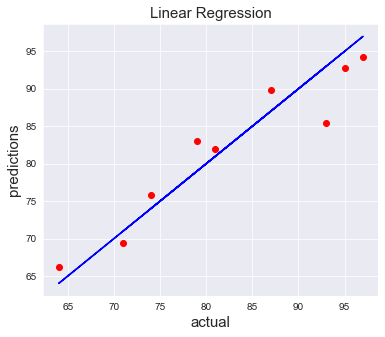

 
Cross Validation score at best cv=4 is : 60.86%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Lasso Model
 
for Lasso model, Best Random_state number for splitting the data is:  19
 
===scores for training set===
r2 score for training set 0.8909966023606181
MAE for training set:  2.7713756957718116
MSE for training set:  11.038262430339039
SMSE for training set:  3.322388061370772
 
===scores for testing set===
r2 score for testing set :  0.887649808388177
MAE for testing set:  2.407184682896682
MSE for testing set:  9.889590940645661
SMSE for testing set:  3.1447720013771523
 
 


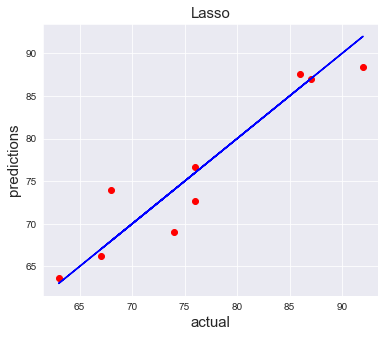

 
Cross Validation score at best cv=4 is : 80.43%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Ridge Model
 
for Ridge model, Best Random_state number for splitting the data is:  39
 
===scores for training set===
r2 score for training set 0.9179701324346861
MAE for training set:  2.208648512205147
MSE for training set:  7.046012207197485
SMSE for training set:  2.6544325584194985
 
===scores for testing set===
r2 score for testing set :  0.9024420266213539
MAE for testing set:  2.865453791471835
MSE for testing set:  14.76618214348397
SMSE for testing set:  3.842679032066557
 
 


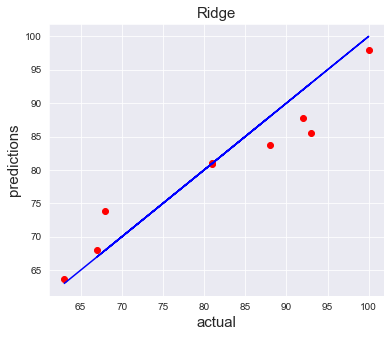

 
Cross Validation score at best cv=4 is : 73.08%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Ada-Boost Regressor Model
 
for Ada-Boost Regressor model, Best Random_state number for splitting the data is:  97
 
===scores for training set===
r2 score for training set 0.993813354439984
MAE for training set:  0.4531746031746031
MSE for training set:  0.6779497354497348
SMSE for training set:  0.8233770311647847
 
===scores for testing set===
r2 score for testing set :  0.8171838407494145
MAE for testing set:  3.7222222222222223
MSE for testing set:  17.34722222222222
SMSE for testing set:  4.164999666533267
 
 


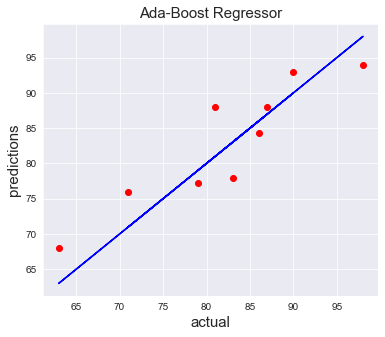

 
Cross Validation score at best cv=4 is : 37.00%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Gradient Boosting Regressor Model
 
for Gradient Boosting Regressor model, Best Random_state number for splitting the data is:  28
 
===scores for training set===
r2 score for training set 0.9999999037180628
MAE for training set:  0.002695480354960282
MSE for training set:  1.0871780829312352e-05
SMSE for training set:  0.0032972383640423016
 
===scores for testing set===
r2 score for testing set :  0.6569687242244729
MAE for testing set:  4.294472142278524
MSE for testing set:  29.71243741779133
SMSE for testing set:  5.450911613463507
 
 


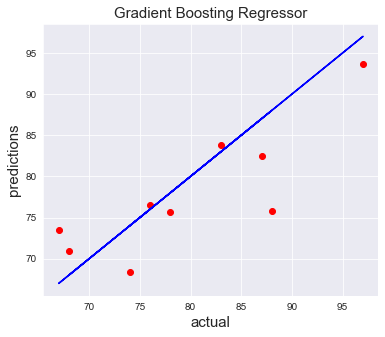

 
Cross Validation score at best cv=4 is : 21.98%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Decision Tree Regressor Model
 
for Decision Tree Regressor model, Best Random_state number for splitting the data is:  39
 
===scores for training set===
r2 score for training set 1.0
MAE for training set:  0.0
MSE for training set:  0.0
SMSE for training set:  0.0
 
===scores for testing set===
r2 score for testing set :  0.3921696574225122
MAE for testing set:  8.444444444444445
MSE for testing set:  92.0
SMSE for testing set:  9.591663046625438
 
 


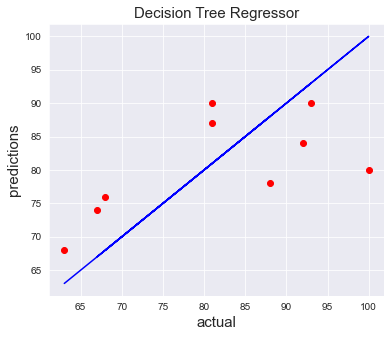

 
Cross Validation score at best cv=4 is : -6.15%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
SVR Model
 
for SVR model, Best Random_state number for splitting the data is:  87
 
===scores for training set===
r2 score for training set 0.1688435314777551
MAE for training set:  8.050440977596804
MSE for training set:  101.34454790335182
SMSE for training set:  10.067002925565872
 
===scores for testing set===
r2 score for testing set :  0.17333299626354925
MAE for testing set:  6.294873692756912
MSE for testing set:  50.78388901966147
SMSE for testing set:  7.126281570332559
 
 


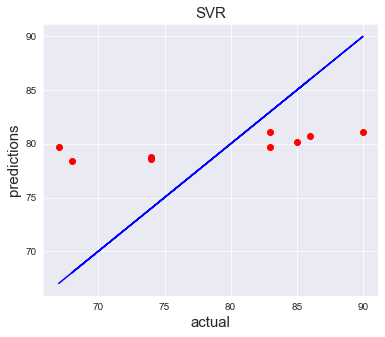

 
Cross Validation score at best cv=6 is : -3.23%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
KNeighbors Regressor Model
 
for KNeighbors Regressor model, Best Random_state number for splitting the data is:  39
 
===scores for training set===
r2 score for training set 0.5355607180570223
MAE for training set:  5.18095238095238
MSE for training set:  39.89333333333332
SMSE for training set:  6.316116950574405
 
===scores for testing set===
r2 score for testing set :  0.5333507340946164
MAE for testing set:  7.688888888888891
MSE for testing set:  70.63111111111114
SMSE for testing set:  8.404231738303695
 
 


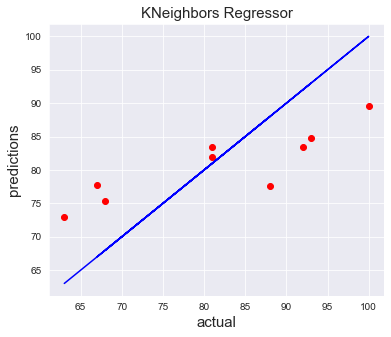

 
Cross Validation score at best cv=4 is : 39.44%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
XGB Regressor Model
 
for XGB Regressor model, Best Random_state number for splitting the data is:  54
 
===scores for training set===
r2 score for training set 0.9999999975945087
MAE for training set:  0.00040762765066964287
MSE for training set:  2.6173490498747144e-07
SMSE for training set:  0.0005116003371651268
 
===scores for testing set===
r2 score for testing set :  0.8084777449272358
MAE for testing set:  3.1929694281684027
MSE for testing set:  18.556378491494495
SMSE for testing set:  4.307711514423232
 
 


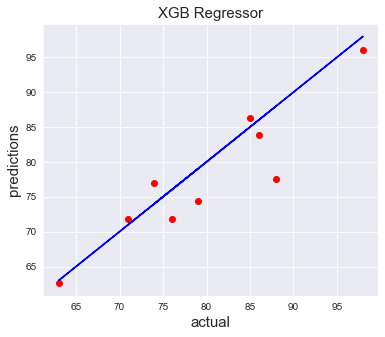

 
Cross Validation score at best cv=4 is : 24.70%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Random Forest Regressor Model
 
for Random Forest Regressor model, Best Random_state number for splitting the data is:  97
 
===scores for training set===
r2 score for training set 0.910503306708604
MAE for training set:  2.5838095238095242
MSE for training set:  9.807295238095241
SMSE for training set:  3.1316601408989517
 
===scores for testing set===
r2 score for testing set :  0.7101555035128804
MAE for testing set:  4.4511111111111115
MSE for testing set:  27.503022222222235
SMSE for testing set:  5.244332390516664
 
 


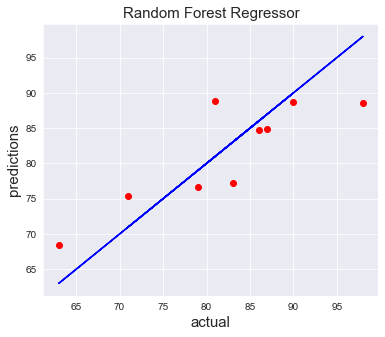

 
Cross Validation score at best cv=4 is : 37.64%
 
 


,algo,best random state,train_r2score,test_r2score,train_mae,train_mse,train_srmse,test_mae,test_mse,test_srmse,best cv fold,cross_val_score
Sr. No.,,,,,,,,,,,,
2,Lasso,19,0.89,0.89,2.77,11.04,3.32,2.41,9.89,3.14,4,0.80
3,Ridge,39,0.92,0.90,2.21,7.05,2.65,2.87,14.77,3.84,4,0.73
1,Linear Regression,6,0.93,0.90,2.31,7.35,2.71,2.89,11.80,3.43,4,0.61
9,XGB Regressor,54,1.00,0.81,0.00,0.00,0.00,3.19,18.56,4.31,4,0.25
4,Ada-Boost Regressor,97,0.99,0.82,0.45,0.68,0.82,3.72,17.35,4.16,4,0.37
5,Gradient Boosting Regressor,28,1.00,0.66,0.00,0.00,0.00,4.29,29.71,5.45,4,0.22
10,Random Forest Regressor,97,0.91,0.71,2.58,9.81,3.13,4.45,27.50,5.24,4,0.38
7,SVR,87,0.17,0.17,8.05,101.34,10.07,6.29,50.78,7.13,6,-0.03
8,KNeighbors Regressor,39,0.54,0.53,5.18,39.89,6.32,7.69,70.63,8.40,4,0.39


In [121]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_r2score = [] 
train_mae = []
train_mse = []
train_srmse = []


#lists to store evaluation metrics data for test set
test_r2score = []
test_mae = []
test_mse = []
test_srmse = []

crossvalscore = []
score_diff = []


models = [lr, ls, rd, abr, gbr, dt, svr, knn, xgb, rfr]
models_name = ['Linear Regression', 'Lasso', 'Ridge',
               'Ada-Boost Regressor', 'Gradient Boosting Regressor',
               'Decision Tree Regressor', 'SVR', 'KNeighbors Regressor', 'XGB Regressor', 'Random Forest Regressor']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 100):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(df_feat, df_tgt, test_size = 0.3, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(r2_score(y_train, pred_train) - r2_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    
    ### splitting the train7 set with best random state
    x_train, x_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=best_i, test_size=.3)
    
    
    ### straining the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    pred_test = model.predict(x_test)
    pred_train = model.predict(x_train)
    
     ### storing metrics into respective lists
    train_r2score.append(round(r2_score(y_train, pred_train),2))
    train_mae.append(round(mean_absolute_error(y_train, pred_train),2))
    train_mse.append(round(mean_squared_error(y_train, pred_train),2))
    train_srmse.append(round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
    
    
    test_r2score.append(round(r2_score(y_test, pred_test),2))
    test_mae.append(round(mean_absolute_error(y_test, pred_test),2))
    test_mse.append(round(mean_squared_error(y_test, pred_test),2))
    test_srmse.append(round(float(np.sqrt(mean_squared_error(y_test, pred_test))),2))
    
    
    ##showing the results in output
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print(models_name[dummy_count] + ' Model')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model, Best Random_state number for splitting the data is: ', best_i)
    print(' ')
    print('===scores for training set===')
    print('r2 score for training set', r2_score(y_train, pred_train))
    print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
    print('MSE for training set: ', mean_squared_error(y_train, pred_train))
    print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
    print(' ')
    print('===scores for testing set===')
    print('r2 score for testing set : ', r2_score(y_test, pred_test))
    print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
    print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
    print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
    print(' ')
    print(' ')
    
    ##plotting the graph with bestfit line, actual & predicted values
    plt.figure(figsize = (6,5))
    plt.scatter(x = y_test, y=pred_test, color = 'r')
    plt.plot(y_test, y_test, color = 'b')
    plt.xlabel('actual', fontsize = 15)
    plt.ylabel('predictions', fontsize = 15)
    plt.title(models_name[dummy_count], fontsize = 15)
    plt.show()
    
    print(' ')
    
    test_accuracy = r2_score(y_test, pred_test)
    cv_diff = []
    best_cv = []
    
    ### loop to find best CV fold value
    for j in range(4,13):
        cv_score = cross_val_score(model, df_feat, df_tgt, cv = j)
        cv_mean = cv_score.mean()
        cv_diff.append(abs(cv_mean - test_accuracy))
        best_cv.append(j)
    
    
    ### printing CV Score based on best CV fold value
    k_f = best_cv[cv_diff.index(min(cv_diff))]
    cv_fold.append(k_f)
    cv_score = cross_val_score(model, df_feat, df_tgt, cv=k_f).mean()
    crossvalscore.append(round(cv_score,2))
    score_diff.append(abs(round(cv_score - test_accuracy,2)))
    print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")          
    dummy_count+=1
    print(' ')
    print(' ')
#     print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    

### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_r2score, test_r2score, train_mae, train_mse,
                              train_srmse, test_mae, test_mse, test_srmse, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_r2score', 'test_r2score', 'train_mae','train_mse',
                                       'train_srmse', 'test_mae', 'test_mse', 'test_srmse', 'best cv fold', 'cross_val_score'],
                              index=pd.RangeIndex(start=1, stop=(len(algo)+1), name='Sr. No.'))


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['test_mae', 'test_r2score', 'cross_val_score', 'test_srmse', 'test_mse' ])

#### Observation
We will select Lasso Regressor model as it has,
1. minimum MAE value on test set, also highest cross val score.
2. difference between Cross_Val_Score & test set score is minimum.
3. train score & test score are similar.

<h1 align = "center"><font color = "red"><b> Hyper paramter tuning using GridSearchCV </b></font></h1>

In [133]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=19)
lasso_alphas = np.linspace(0, 0.002, 40)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=19, test_size=.3)

In [139]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression

params = {'alpha': np.linspace(0, 1, 100),
         'max_iter' : [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 3000, 5000],
         'selection' : ['cyclic', 'random']}
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, scoring='neg_mean_absolute_error', cv = 4)
lasso_model.fit(x_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.696969696969697, 'max_iter': 1600, 'selection': 'random'}
-3.939724471086476


In [140]:
lasso_tuned = Lasso(alpha= 0.696969696969697, max_iter= 1600, selection= 'random')

In [141]:
lasso_tuned.fit(x_train, y_train)

Lasso(alpha=0.696969696969697, max_iter=1600, selection='random')

In [142]:
pred_test = model.predict(x_test)

In [144]:
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))

r2 score for testing set :  0.9344800000000002
MAE for testing set:  1.746666666666665
MSE for testing set:  5.767377777777764
SMSE for testing set:  2.4015365451680646


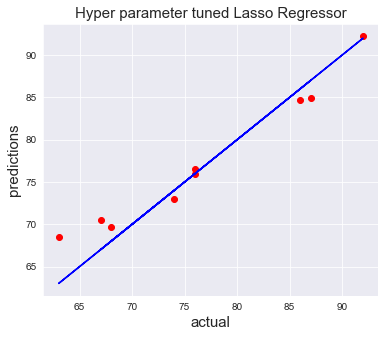

In [155]:
##plotting the graph with bestfit line, actual & predicted values
plt.figure(figsize = (6,5))
plt.scatter(x =y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Hyper parameter tuned Lasso Regressor', fontsize = 15)
plt.show()

In [152]:
cross_val_score(lasso_tuned, df_feat, df_tgt, cv = 4, scoring ='r2').mean()

0.8242770656543714

### Observation:
After Hyperparameter tuning using Gridsearch CV we have improved both test & cross validation score.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [153]:
filename='baseball.pkl'
pickle.dump(lasso_tuned,open(filename,'wb'))

In [156]:
model =pickle.load(open('baseball.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,76,76.161965
1,76,71.808913
2,67,64.557531
3,87,87.477599
4,68,73.455105
5,92,88.383953
6,86,88.019803
7,63,62.353170
8,74,68.283110
